# Sentinel-1 InSAR processing

This notebook provides an example to compute the geocoded InSAR coherence and the geocoded (flattened + terrain corrected + multilooked + filtered) interferogram on a user defined InSAR pair list

In [1]:
import openeo

import rasterio
from rasterio.plot import show

import matplotlib.pyplot as plt

Create a datacube with the geocoded InSAR coherence and interferograms for a list of InSAR pairs

In [2]:
url = "https://openeo.dataspace.copernicus.eu"
connection = openeo.connect(url).authenticate_oidc()

datacube = connection.datacube_from_process(
    process_id="insar_interferogram_snaphu",
    InSAR_pairs=[
        ["2024-08-21", "2024-09-02"]
    ],
    burst_id=249435,
    polarization="vv",
    sub_swath="IW2",
    coherence_window_rg=10,
    coherence_window_az=2,
    n_rg_looks=4,
    n_az_looks=1,
)

datacube = datacube.save_result(format='GTiff')

Authenticated using refresh token.


In [3]:
job = datacube.create_job(title='InSAR_interferogram_unwrapping')
job.start_and_wait()
job.get_results().download_files()

0:00:00 Job 'j-2510070655304021af4830435e55b5fd': send 'start'
0:00:12 Job 'j-2510070655304021af4830435e55b5fd': created (progress 0%)
0:00:17 Job 'j-2510070655304021af4830435e55b5fd': created (progress 0%)
0:00:24 Job 'j-2510070655304021af4830435e55b5fd': running (progress N/A)
0:00:32 Job 'j-2510070655304021af4830435e55b5fd': running (progress N/A)
0:00:42 Job 'j-2510070655304021af4830435e55b5fd': running (progress N/A)
0:00:54 Job 'j-2510070655304021af4830435e55b5fd': running (progress N/A)
0:01:09 Job 'j-2510070655304021af4830435e55b5fd': running (progress N/A)
0:01:28 Job 'j-2510070655304021af4830435e55b5fd': running (progress N/A)
0:01:52 Job 'j-2510070655304021af4830435e55b5fd': running (progress N/A)
0:02:22 Job 'j-2510070655304021af4830435e55b5fd': running (progress N/A)
0:03:00 Job 'j-2510070655304021af4830435e55b5fd': running (progress N/A)
0:03:47 Job 'j-2510070655304021af4830435e55b5fd': running (progress N/A)
0:04:45 Job 'j-2510070655304021af4830435e55b5fd': running (prog

[PosixPath('/home/jovyan/mystorage/ClouDInSAR/mtr/openEO_2024-08-21Z.tif'),
 PosixPath('/home/jovyan/mystorage/ClouDInSAR/mtr/job-results.json')]

In [3]:
job_id = 'j-2510070655304021af4830435e55b5fd'
job = connection.job(job_id)
job

<BatchJob job_id='j-2510070655304021af4830435e55b5fd'>

In [4]:
job.get_results().download_files()

[PosixPath('/home/jovyan/mystorage/ClouDInSAR/demo/interferogram/openEO_2024-08-21Z.tif'),
 PosixPath('/home/jovyan/mystorage/ClouDInSAR/demo/interferogram/job-results.json')]

# Visualization of the results

Visualize the band names

In [5]:
with rasterio.open('openEO_2024-08-21Z.tif') as src:
    print(src.descriptions)

('Phase_ifg_VV', 'Unw_Phase_ifg_VV', 'coh_VV')


Visualize the interferogram

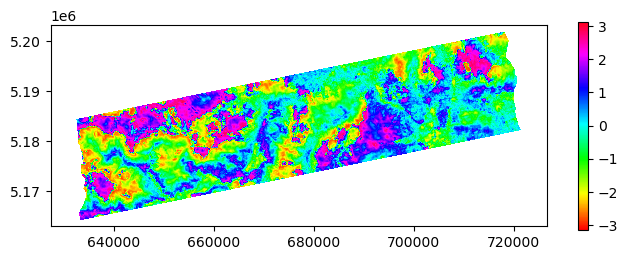

In [6]:
with rasterio.open('openEO_2024-08-21Z.tif') as src:
    fig, ax = plt.subplots(figsize=(8, 6))
    im = show(src.read(1), transform=src.transform, cmap='hsv', ax=ax)
    cbar = fig.colorbar(im.get_images()[0], ax=ax, orientation="vertical", shrink=0.45)

Visualize the unwrapped interferogram

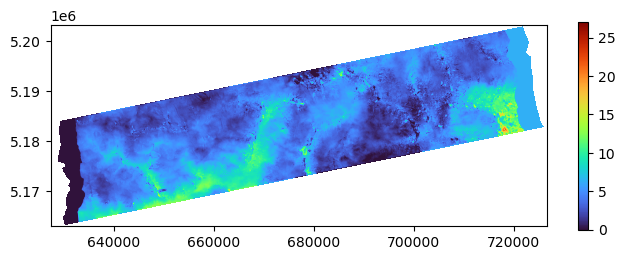

In [7]:
with rasterio.open('openEO_2024-08-21Z.tif') as src:
    fig, ax = plt.subplots(figsize=(8, 6))
    im = show(src.read(2), transform=src.transform, cmap='turbo', ax=ax)
    cbar = fig.colorbar(im.get_images()[0], ax=ax, orientation="vertical", shrink=0.45)

Visualize the InSAR coherence

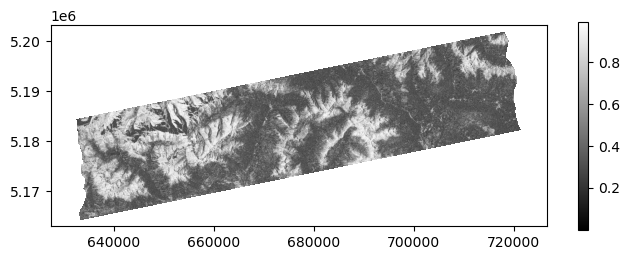

In [8]:
with rasterio.open('openEO_2024-08-21Z.tif') as src:
    fig, ax = plt.subplots(figsize=(8, 6))
    im = show(src.read(3), transform=src.transform, cmap='gray', ax=ax)
    cbar = fig.colorbar(im.get_images()[0], ax=ax, orientation="vertical", shrink=0.45)